# Homework 4: Data Visualization

- **Name**: Mukul Deepak Karandikar
- **UB Username**: mukulkar
- **UB Person Number**: 50544988

--- 
## Part 1 - Generate Plots According to Specifications

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pwd #filepath

'C:\\Users\\mukul\\Downloads'

### Problem 1 - Scatter Plot with a Line

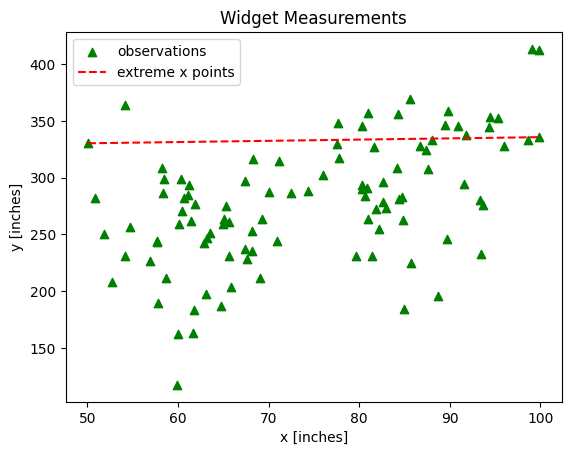

In [4]:
df = pd.read_csv("C:\\Users\\mukul\\Downloads\\ProgrammingAssignments\\scatter_data.csv")
df.columns = df.columns.str.strip()

x = df["% x"]
y = df["y"]
plt.scatter(x, y, color="green", marker="^", label="observations")

x1 = df["% x"].min()
x2 = df["% x"].max()
y1 = df.loc[df["% x"] == x1, "y"].values[0]
y2 = df.loc[df["% x"] == x2, "y"].values[0]
plt.plot([x1, x2], [y1, y2], "r--", label="extreme x points")

plt.title("Widget Measurements")
plt.xlabel("x [inches]")
plt.ylabel("y [inches]")
plt.legend()

plt.show()

### Problem 2 - Histogram

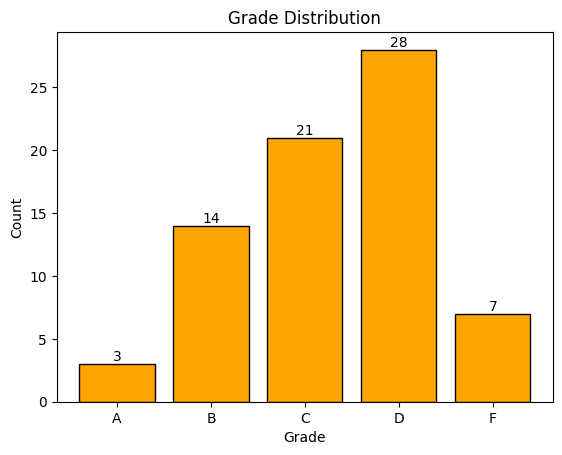

In [5]:
df = pd.read_csv("C:\\Users\\mukul\\Downloads\\ProgrammingAssignments\\student_grades.csv")
df.columns = df.columns.str.strip()

score = [(90, 100), (80, 90), (70, 80), (60, 70), (0, 60)]
label = ["A","B","C","D","F"]
df["Grade"] = pd.cut(df["avgScore"],
    bins=[0, 60, 70, 80, 90, 101],
    labels=label,
    right=False)

grades = df["Grade"].value_counts().reindex(label, fill_value=0)
plt.bar(label, grades, color="orange", edgecolor="black")

for label, count in zip(label, grades):
    plt.text(label, count, str(count), ha="center", va="bottom")

plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

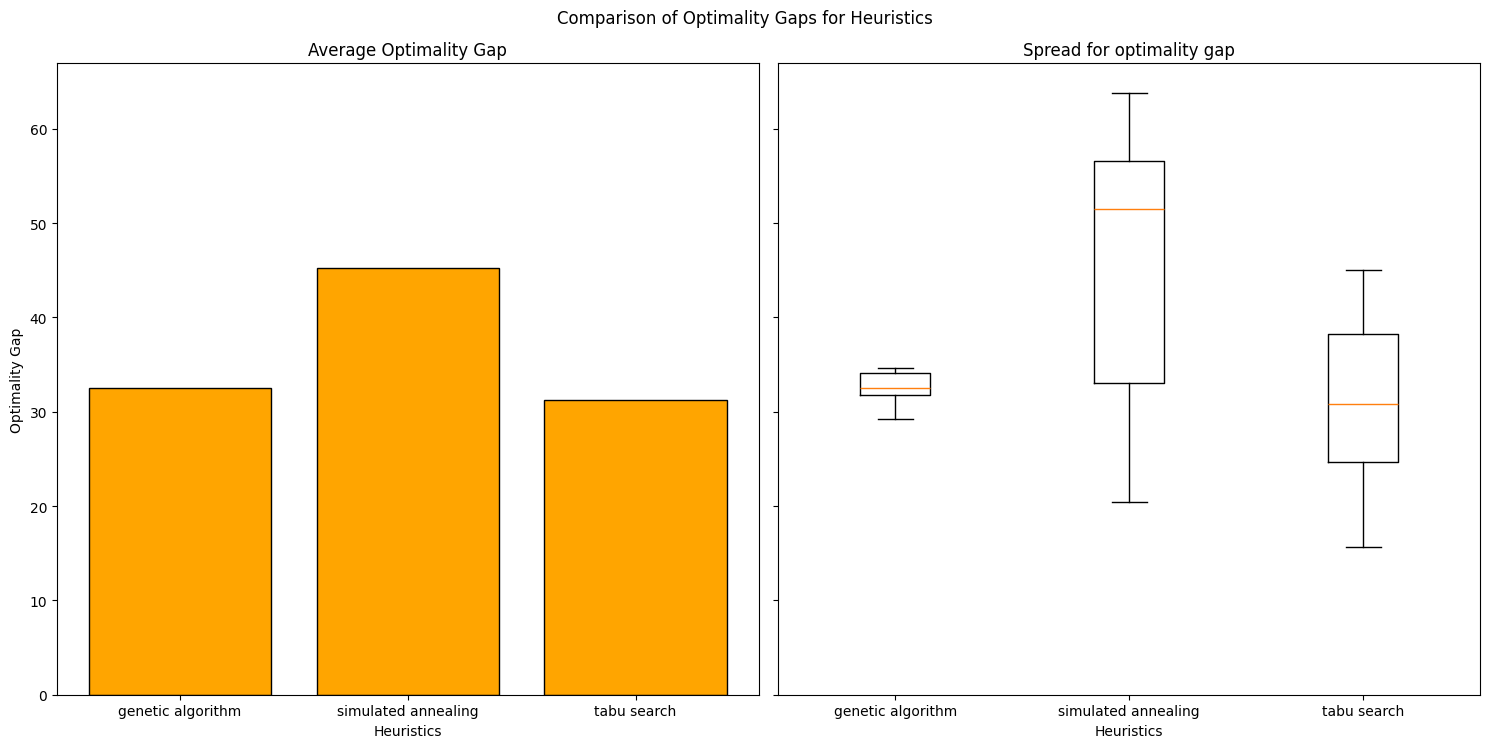

In [6]:
df= pd.read_csv("C:\\Users\\mukul\\Downloads\\ProgrammingAssignments\\solution_data.csv")
df.columns = df.columns.str.strip()

optimal = df[df["SolnMethod"]=="optimal"]
merge = df.merge(optimal, on="% Problem", suffixes=("","optimal"))
merge["optimality_gap"] = ((merge["Valueoptimal"] - merge["Value"])/merge["Valueoptimal"])*100
heuristic = merge[merge["SolnMethod"] != "optimal"]
average = heuristic.groupby("SolnMethod")["optimality_gap"].mean().reset_index()
boxplot = heuristic.groupby("SolnMethod")["optimality_gap"].apply(list).reset_index(name="optimality_gap")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey = True)
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

ax1.bar(average["SolnMethod"], average["optimality_gap"], color="orange", edgecolor="black")
ax1.set(title="Average Optimality Gap", xlabel="Heuristics", ylabel="Optimality Gap")

boxplot_data=[row["optimality_gap"] for index, row in boxplot.iterrows()]
ax2.boxplot(boxplot_data)
ax2.set(title="Spread for optimality gap", xlabel="Heuristics", xticklabels=boxplot["SolnMethod"])

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

--- 
## Part 2 - Explore New Plot Types

- **URL of Example Code**:  https://seaborn.pydata.org/examples/spreadsheet_heatmap.html
- **URL of Sample Data**:  https://www.kaggle.com/datasets/roopacalistus/superstore/data

Annotated heatmap is a data viz tool that helps provide information in combination with a heatmap.

Here, in this example, we are going to use heatmaps to understand trend in the sales of the superstore. The heatmap will allow us to find which product categories are in high-demand and which product categories have hardly any demand so as to be taken off from the shelves.

In [7]:
#df = pd.read_csv("C:\\Users\\mukul\\Downloads\\ProgrammingAssignments\\SampleSuperstore.csv")
#df
#df.info()

In [8]:
pip install seaborn

C:\Users\mukul\AppData\Local\Temp\ipykernel_31728\871495728.py:5: FutureWarning: The provided callable <function mean at 0x000001FA72144D60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  superstore_pivot = superstore_df.pivot_table(index="State", columns="Sub-Category", values="Quantity", aggfunc=np.mean)


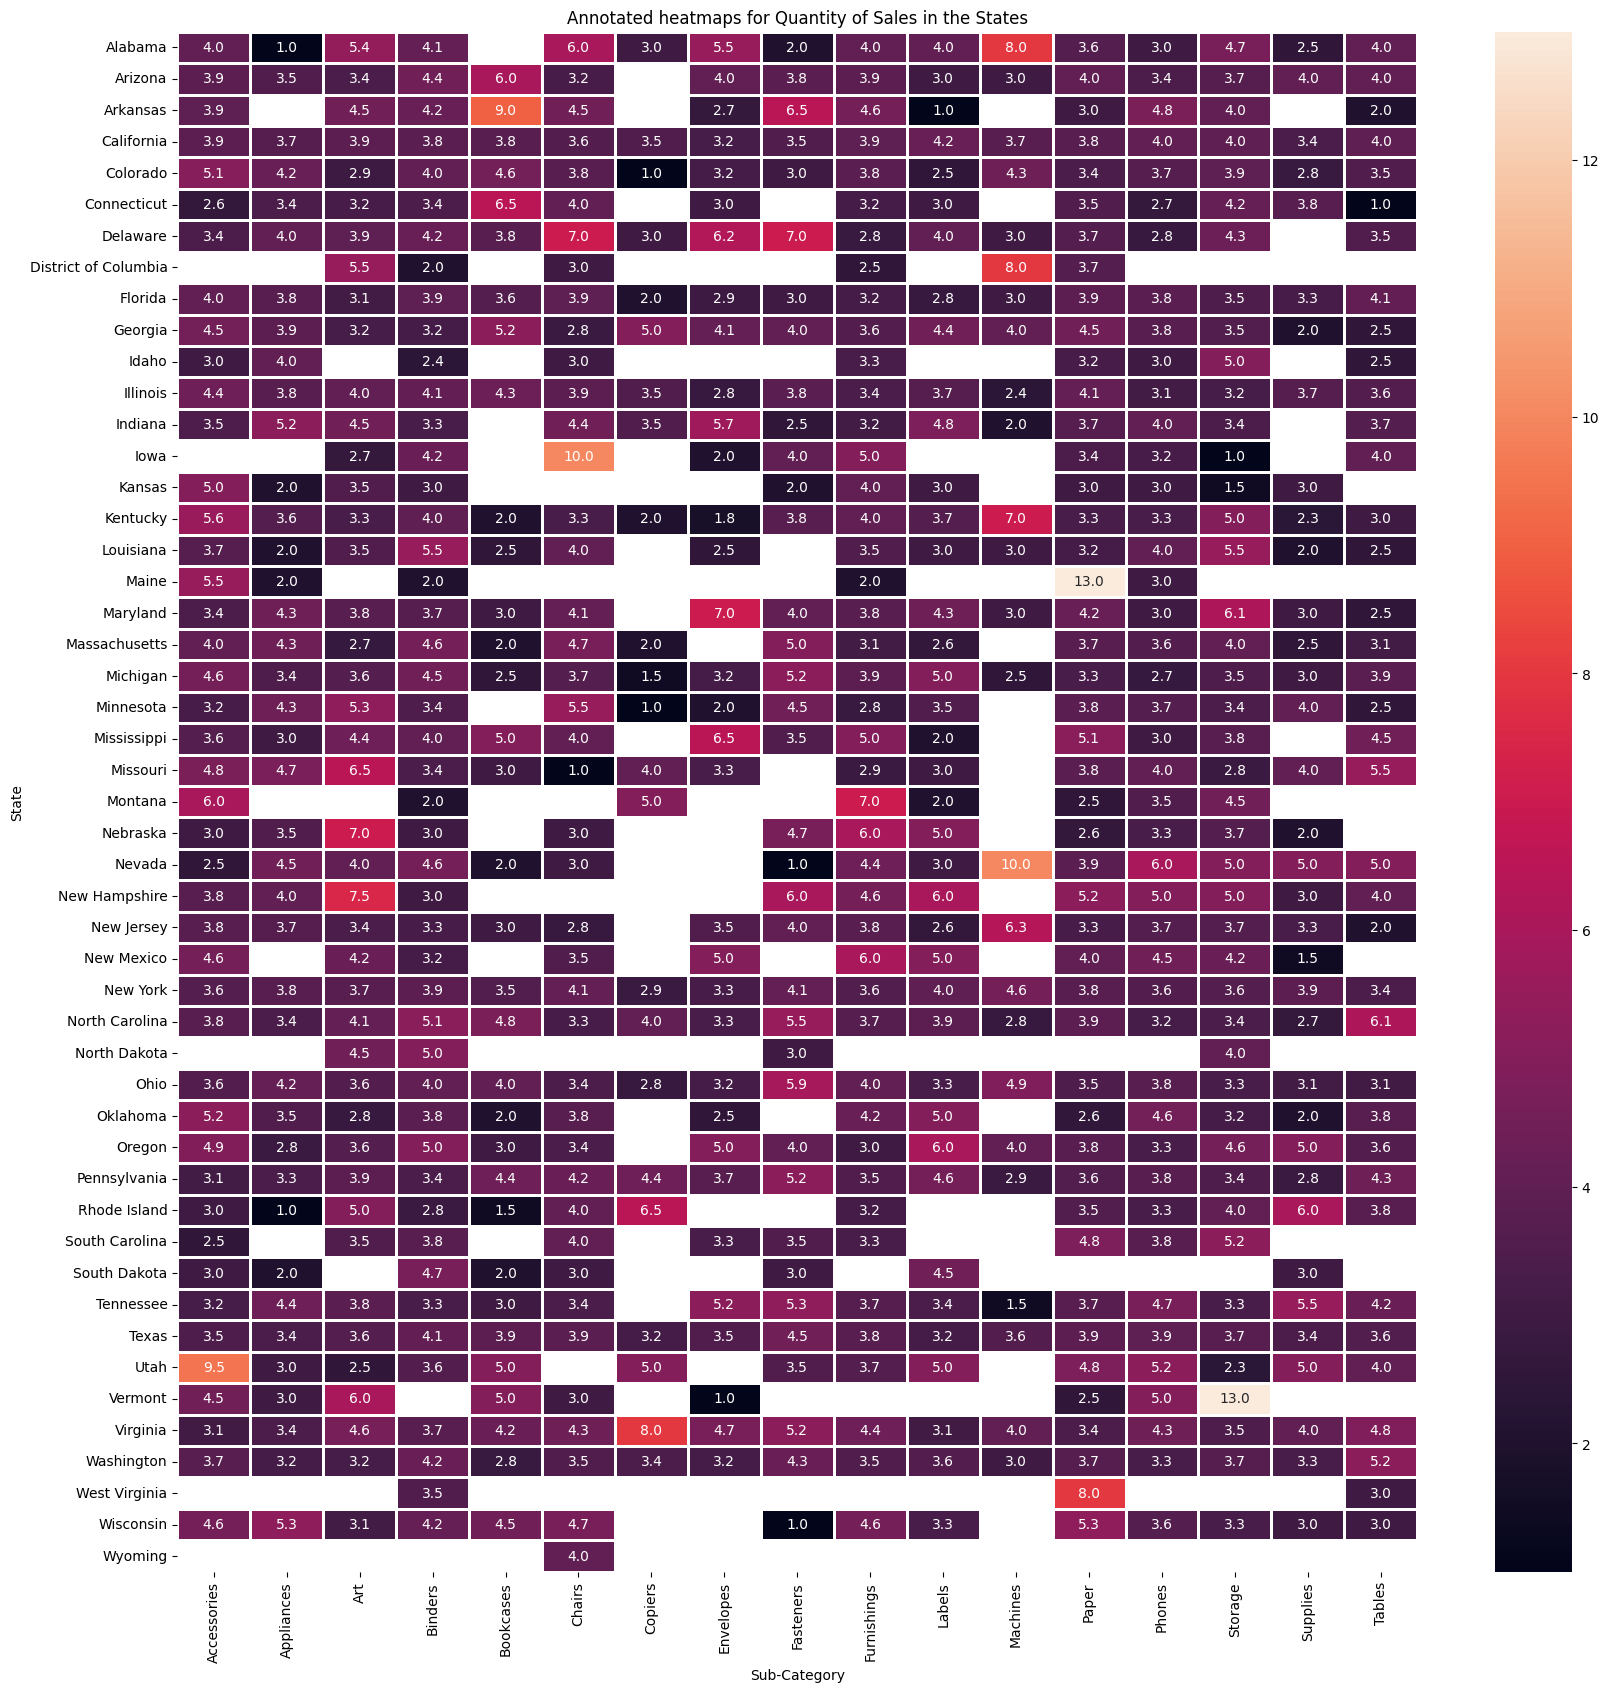

In [9]:
import seaborn as sns

superstore_df = pd.read_csv("C:\\Users\\mukul\\Downloads\\ProgrammingAssignments\\SampleSuperstore.csv")

superstore_pivot = superstore_df.pivot_table(index="State", columns="Sub-Category", values="Quantity", aggfunc=np.mean)

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(superstore_pivot, annot=True, fmt=".1f", linewidths=1, ax=ax)
plt.title("Annotated heatmaps for Quantity of Sales in the States")
plt.show()

C:\Users\mukul\AppData\Local\Temp\ipykernel_31728\1858033688.py:1: FutureWarning: The provided callable <function mean at 0x000001FA72144D60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  superstore_pivot = superstore_df.pivot_table(index="State", columns="Sub-Category", values="Sales", aggfunc=np.mean)


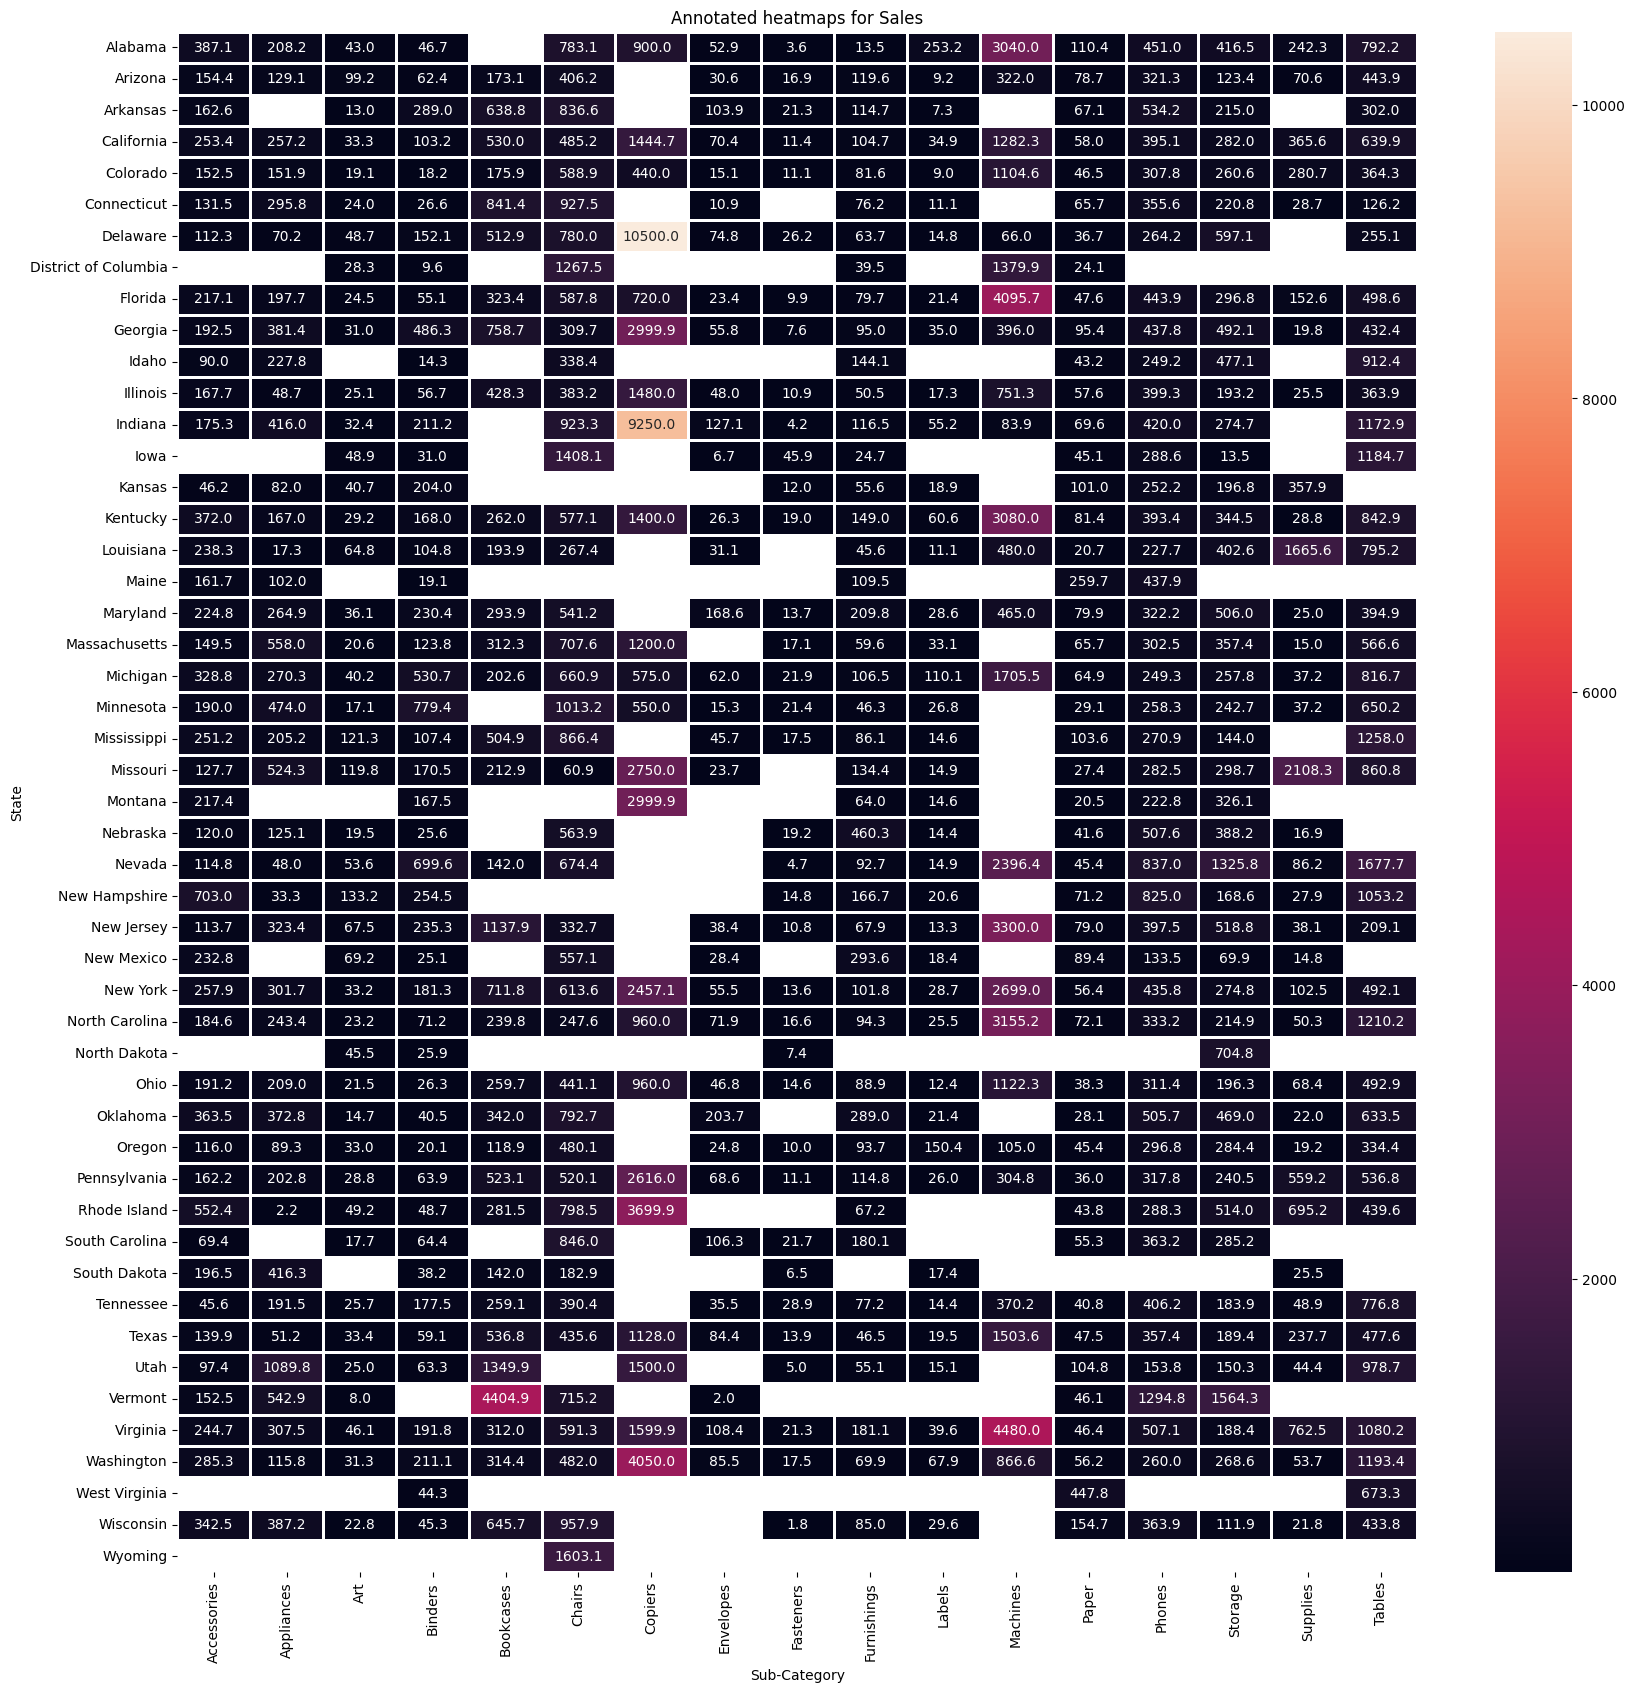

In [10]:
superstore_pivot = superstore_df.pivot_table(index="State", columns="Sub-Category", values="Sales", aggfunc=np.mean)

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(superstore_pivot, annot=True, fmt=".1f", linewidths=1, ax=ax)
plt.title("Annotated heatmaps for Sales")
plt.show()

C:\Users\mukul\AppData\Local\Temp\ipykernel_31728\829562389.py:1: FutureWarning: The provided callable <function mean at 0x000001FA72144D60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  superstore_pivot = superstore_df.pivot_table(index="Segment", columns="Sub-Category", values="Quantity", aggfunc=np.mean)


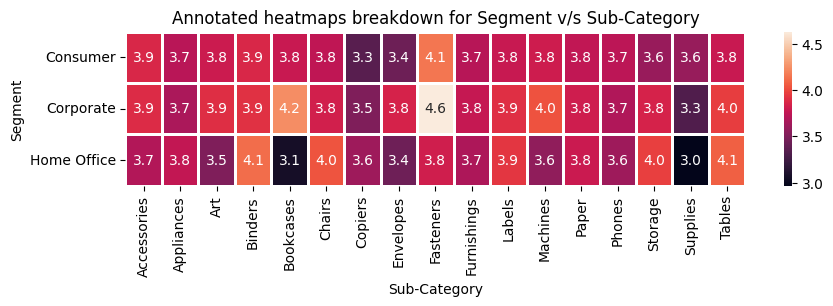

In [11]:
superstore_pivot = superstore_df.pivot_table(index="Segment", columns="Sub-Category", values="Quantity", aggfunc=np.mean)

f, ax = plt.subplots(figsize=(10,2))
sns.heatmap(superstore_pivot, annot=True, fmt=".1f", linewidths=1, ax=ax)
plt.title("Annotated heatmaps breakdown for Segment v/s Sub-Category")
plt.show()

[The viz can be tweaked using different column names in the pivot table in the position of index, columns, and values. The size of the table and linewidth can be adjusted using figsize=(#,#) and linewidth=# respectively. The annotations can be kept hidden by usign the False value. Lastly, the decimal precision of the annotated vales can changed using fmt=".1f". Have fun!]